In [74]:
from coralModel import Reef
from coralModel import Organism
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as clt
import tools as tl

from mpl_toolkits.axes_grid1.inset_locator import InsetPosition

## Set Parameters

In [75]:
## What needs to be set
NumberOfSimulations = 100
dt=.01
tf=10

coralPercent = .5
algaePercent = .25
r=1.0
d=.4
a=.2
g=.9
y=.75

rows = 20
columns = 20

## Set up based on above
NumberOfRuns = int(tf/dt)
turfPercent = 1 - coralPercent - algaePercent
NumberOfNodes = rows * columns
coralCount = np.zeros((NumberOfRuns, NumberOfSimulations))
turfCount = np.zeros((NumberOfRuns, NumberOfSimulations))
algaeCount = np.zeros((NumberOfRuns, NumberOfSimulations))
types = np.zeros((NumberOfRuns, NumberOfNodes, NumberOfSimulations))

## Generate square 8x8 reef with randomly assigned types

In [77]:
#0 = Coral, 1 = Turf, 2 = Algae
Moorea = Reef()
count = 0
for i in range(0,rows):
    for j in range(0, columns):
        U = np.random.choice([0,1,2],
                             p=[coralPercent, turfPercent, algaePercent])
        node = Organism(type=U, location=[i,j], ID=count)
        Moorea.append(node)
        count = count + 1
Moorea.generateGraph()

## Run model

In [78]:
for s in range(0,NumberOfSimulations):    
    for n in range(0,NumberOfRuns):
        for i,val in enumerate(Moorea.nodes):
            types[n,i,s] = Moorea.nodes[i].type
        coralCount[n,s] = np.count_nonzero(types[n,:,s] == 0)
        turfCount[n,s] = np.count_nonzero(types[n,:,s] == 1)
        algaeCount[n,s] = np.count_nonzero(types[n,:,s] == 2)
        Moorea.roll(r=r, d=d, a=a, g=g, y=y, dt=dt)

## Plotting inital and last spatial distribution of model runs

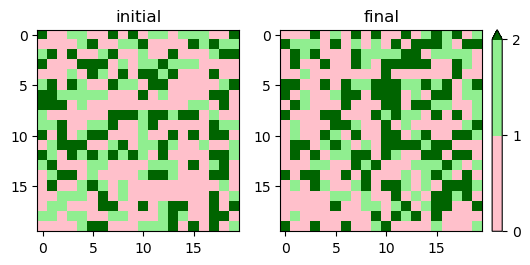

In [87]:
##initial
data1 = np.reshape(types[0,:,0], (-1, rows))
##final
data2 = np.reshape(types[NumberOfRuns-1,:,0], (-1, rows))
##plot
tl.initialFinal(data1=data1, data2=data2)                   

## Animation

In [148]:
%matplotlib inline
from matplotlib.animation import FuncAnimation
from IPython.display import HTML


plt.style.use('seaborn-pastel')

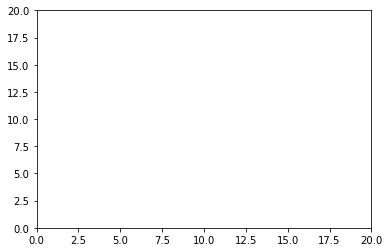

In [154]:
fig = plt.figure()
ax = plt.axes(xlim=(0, 20), ylim=(0, 20))

colors = ['pink', 'lightgreen','darkgreen']
levels = [0, 1, 2]
cmap, norm = clt.from_levels_and_colors(levels=levels,
                                        colors=colors, 
                                        extend='max')

In [155]:
data1.shape

(20, 20)

In [156]:
im = ax.imshow(np.empty((20,20)), cmap=cmap, norm=norm)

In [167]:
def init():
    im.set_data(np.empty((20,20)))
    return(im)

def animate(i):
    image.append([np.reshape(types[i,:,0], (-1, rows))])
    im.set_data(image)
    return(im)

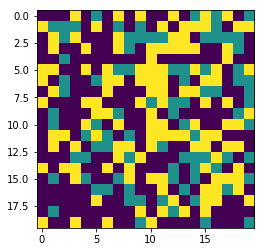

In [175]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


fig = plt.figure("Moving Wavepackage")

Z   = []
img = []
for i in range(NumberOfRuns):
    Z.append(np.reshape(types[i,:,0], (-1, rows)))
    img.append([plt.imshow(Z[i])])

ani = animation.ArtistAnimation(fig, img, interval=20, blit=True,repeat_delay=0)

HTML(ani.to_html5_video())

TypeError: 'AxesImage' object is not iterable

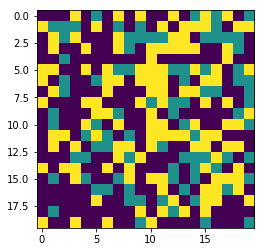

In [171]:
fig = plt.figure("hey hey")
Z = []
img = []
for i in range(NumberOfRuns):
    Z.append(np.reshape(types[i,:,0], (-1, rows)))
    img.append(plt.imshow(Z[i]))

anim = animation.ArtistAnimation(fig, img, interval=20, blit=True,repeat_delay=0)
HTML(anim.to_html5_video())

In [168]:
anim = FuncAnimation(fig, animate, init_func=init,
                     frames=200, interval=20, blit=True)
HTML(anim.to_html5_video())

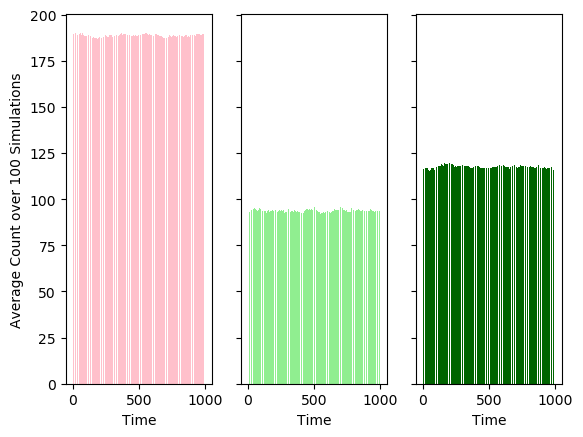

In [85]:
#Plotting histograms
x = np.arange(NumberOfRuns)
ylabel = "Average Count over 100 Simulations"
#plot
tl.averageHists(x, coralCount, turfCount, algaeCount, ylabel) 

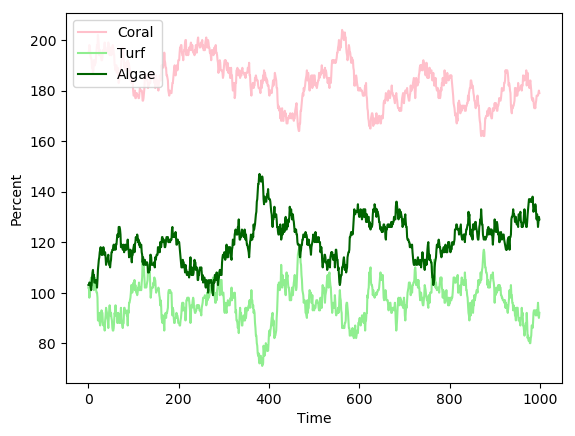

In [91]:
#Plotting progression over time for 1 simulation
x1=coralCount[:,5]
x2=turfCount[:,5]
x3=algaeCount[:,5]
tl.timeSeries(x, x1,x2,x3)

# Begin TDA

#### Steps
* Set values to 1 = Coral, 0 = Other
* create a finer grid
* use gaussians at each node to create variation based on overlap
* Do TDA on output 


In [65]:
from ripser import ripser, lower_star_img
from persim import plot_diagrams
from scipy import ndimage
import PIL

### Make Binary (including inverse (i)) and refine grid

In [66]:
tester, testeri = tl.tda_prep(types[999,:,1], columns, rows, 8, True)

### Add texture (empasize larger patches)

In [67]:
yo = ndimage.distance_transform_edt(tester)
yoi = ndimage.distance_transform_edt(testeri)

### Run TDA
RE [Ripser](https://ripser.scikit-tda.org/Lower%20Star%20Image%20Filtrations.html) approach

In [68]:
prep = tl.prep2(yo)
prepi = tl.prep2(yoi)

#RUN Lower Star Algorithm
dgm = lower_star_img(-prep)
dgmi = lower_star_img(-prepi)

#Grab points above a threshold
threshold = 4
points = tl.pointDef(dgm, threshold)
pointsi = tl.pointDef(dgmi, threshold)


In [69]:
### can already grab number of patches here with 
points.shape[0]

11

### Plot output

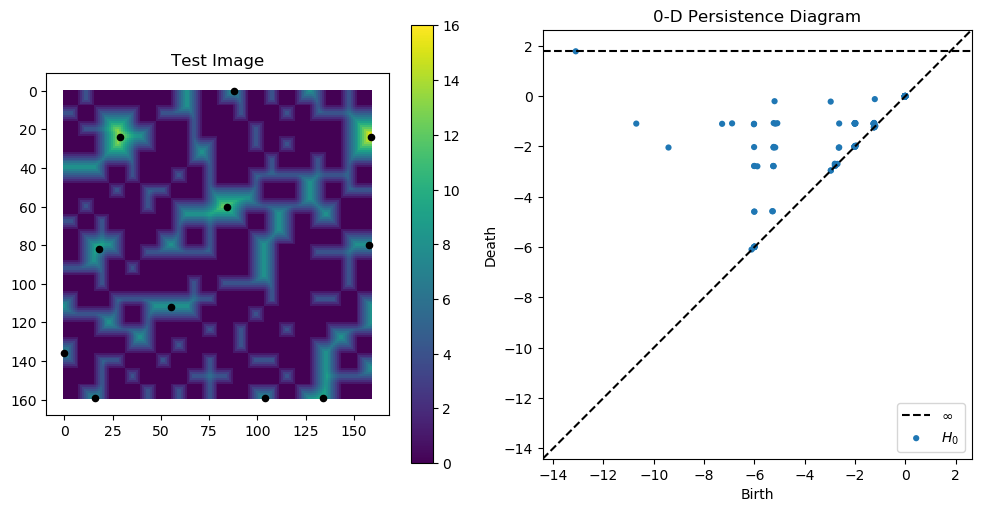

In [70]:
tl.plotTDA(points, yo, prep, dgm)

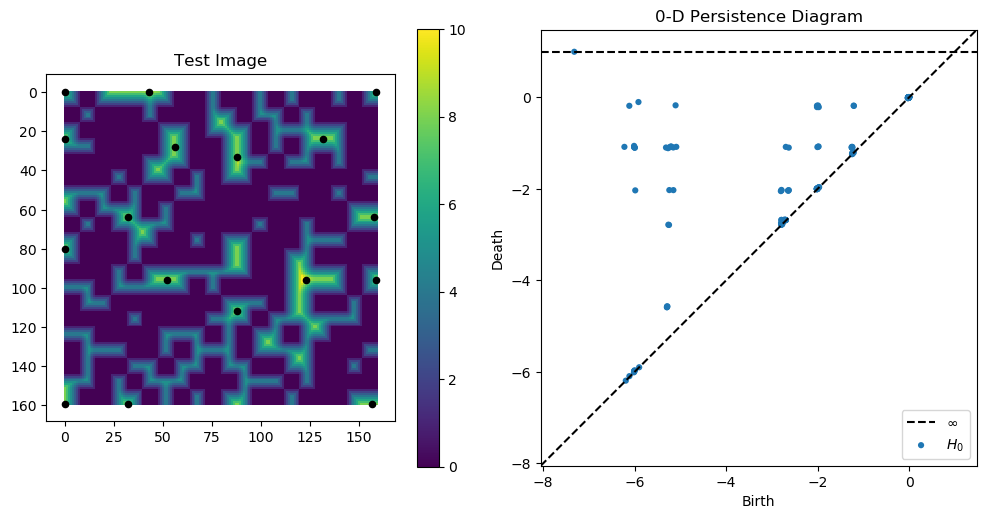

In [71]:
tl.plotTDA(pointsi, yoi, prepi, dgmi)

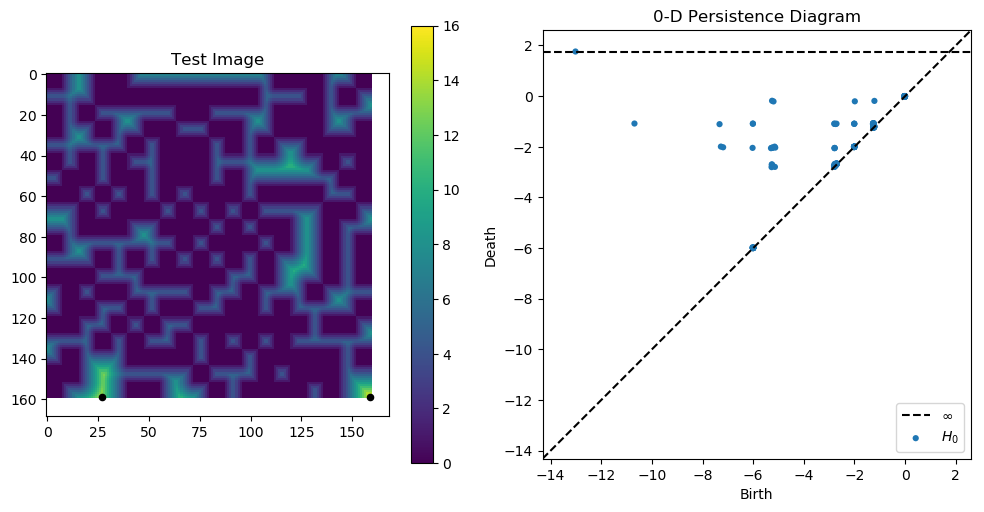

In [72]:
tester, testeri = tl.tda_prep(types[0,:,1], columns, rows, 8, True)
yo = ndimage.distance_transform_edt(tester)
yoi = ndimage.distance_transform_edt(testeri)
prep = tl.prep2(yo)
prepi = tl.prep2(yoi)

#RUN Lower Star Algorithm
dgm = lower_star_img(-prep)
dgmi = lower_star_img(-prepi)

#Grab points above a threshold
threshold = 8
points = tl.pointDef(dgm, threshold)
pointsi = tl.pointDef(dgmi, threshold)

tl.plotTDA(points, yo, prep, dgm)

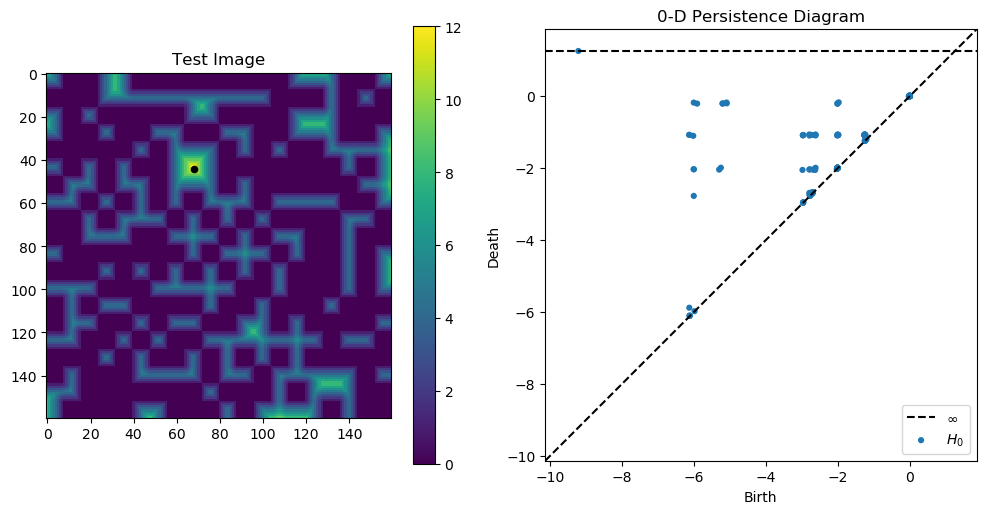

In [73]:
tl.plotTDA(pointsi, yoi, prepi, dgmi)

--------

--------

--------

--------

--------

--------

--------

Proximity of Patches less relevant? looking at neighbour relations, not global